In [1]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("datasets/tegucigalpa_rooftop_solar_potential.csv")

# Step 2: Display basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nPreview:")
print(df.head())

Shape: (165629, 17)

Columns:
 ['OBJECTID', 'uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Estimated_Installation_Efficiency', 'Unit_installation_price', 'Date_added', 'aoi', 'roof_quality', 'Comment']

Preview:
   OBJECTID                                  uuid      City  Surface_area  \
0         1  b19a5e94-ef54-44bd-9a88-e534e4d4ced1  Honduras     61.639999   
1         2  1244baa5-640e-4bb9-bebd-aa22f081cc7a  Honduras     63.049999   
2         3  09ef874c-d6a3-4206-8399-0252283e206a  Honduras     53.480000   
3         4  8a6982bf-81da-4d84-a88a-c7c06d28882b  Honduras    145.850006   
4         5  5446b80a-e668-43eb-a99d-400f5a6eb56e  Honduras     32.430000   

   Potential_installable_area  Peak_installable_capacity  \
0                   16.230000                       3.15   
1                   31.170000 

In [2]:
# Step 2: Drop fully empty columns
df = df.drop(columns=['Unit_installation_price', 'Date_added', 'roof_quality', 'Comment'])

# Verify new shape and columns
print("Shape after dropping:", df.shape)
print("\nRemaining columns:")
print(df.columns.tolist())

Shape after dropping: (165629, 13)

Remaining columns:
['OBJECTID', 'uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Estimated_Installation_Efficiency', 'aoi']


In [3]:
# Step 3: Check missing values and datatypes
print("Missing Values Summary:\n", df.isna().sum())
print("\nData Types:\n", df.dtypes)

Missing Values Summary:
 OBJECTID                                 0
uuid                                     0
City                                     0
Surface_area                             0
Potential_installable_area               0
Peak_installable_capacity                0
Energy_potential_per_year                0
Assumed_building_type                    0
Estimated_tilt                           0
Estimated_building_height            16222
Estimated_capacity_factor             3870
Estimated_Installation_Efficiency        0
aoi                                      0
dtype: int64

Data Types:
 OBJECTID                               int64
uuid                                  object
City                                  object
Surface_area                         float64
Potential_installable_area           float64
Peak_installable_capacity            float64
Energy_potential_per_year            float64
Assumed_building_type                 object
Estimated_tilt               

In [4]:
# Step 4: Descriptive statistics
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
stats = df[numeric_cols].describe().T  # transpose for readability

print("Descriptive Statistics:\n")
print(stats)

Descriptive Statistics:

                                      count          mean           std  \
OBJECTID                           165629.0  82815.000000  47813.118205   
Surface_area                       165629.0    105.546574    173.396624   
Potential_installable_area         165629.0     54.751421    120.949208   
Peak_installable_capacity          165629.0     10.621821     23.467296   
Energy_potential_per_year          165629.0  15475.077191  35025.403123   
Estimated_tilt                     165629.0     20.080573      6.274609   
Estimated_building_height          149407.0      9.488272      8.834568   
Estimated_capacity_factor          161759.0   1443.798116     72.022113   
Estimated_Installation_Efficiency  165629.0    125.148897     39.051314   

                                       min           25%           50%  \
OBJECTID                              1.00  41408.000000  82815.000000   
Surface_area                          1.01     40.990002     71.809998   
Po

👉 Interpretation:
Most rooftops are between 40–120 m², but a few extremely large buildings are skewing the distribution.
We’ll confirm this later with a histogram.

⚙️ 2. Potential_installable_area (m²)

| mean = 54.75 | max = 17,013 ⚠️ |
This follows the same pattern — a few massive rooftops are creating outliers.
Most of the data is still valid.

⚙️ 3. Peak_installable_capacity (kWp)

| mean = 10.6 | max = 3,303 kWp ⚠️ |
That’s very high — normal household systems are 2–15 kWp.
So the extreme values probably belong to commercial or multi-block structures.
We won’t drop them yet, but later we can filter them for visualization clarity.

⚙️ 4. Energy_potential_per_year (kWh/year)

| mean = 15,475 | max = 4,850,533 kWh/year ⚠️ |
Same story — household values up to 20,000 kWh/year are normal,
so the few million-kWh rooftops likely correspond to industrial complexes.

⚙️ 5. Estimated_tilt (°)

| mean = 20° | range = 0–37° |
✅ Perfectly reasonable for rooftop tilt angles — nothing strange here.

⚙️ 6. Estimated_building_height (m)

| mean = 9.49 m | max = 99.97 m |
✅ Normal distribution: single-story to 10-story buildings.
Only a few tall ones near 100 m (no problem).

⚙️ 7. Estimated_capacity_factor

| mean = 1443 | range = 1088–1567 |
⚠️ The scale looks suspiciously high — normally, solar capacity factor is expressed as a percentage (10–25 %).
So this may actually be scaled ×100, or the unit name is misleading.
We’ll check consistency later by comparing across cities.

⚙️ 8. Estimated_Installation_Efficiency

| mean = 125 | range = 0–248 |
Again, this looks too high for efficiency (%), likely scaled or derived from a formula,
but still consistent (no impossible negatives).

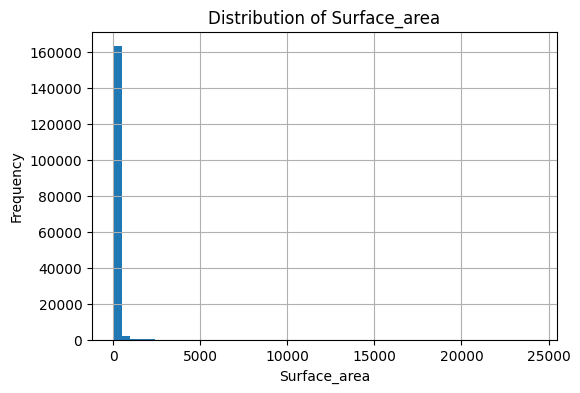

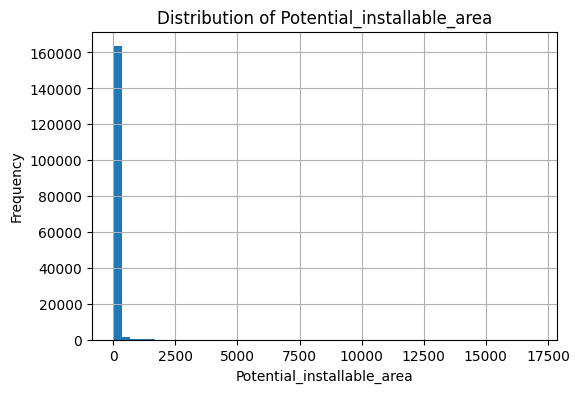

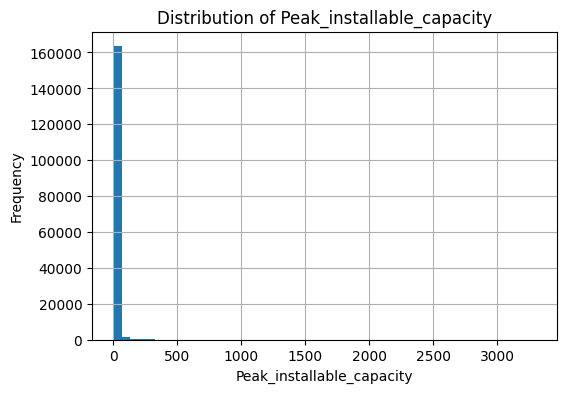

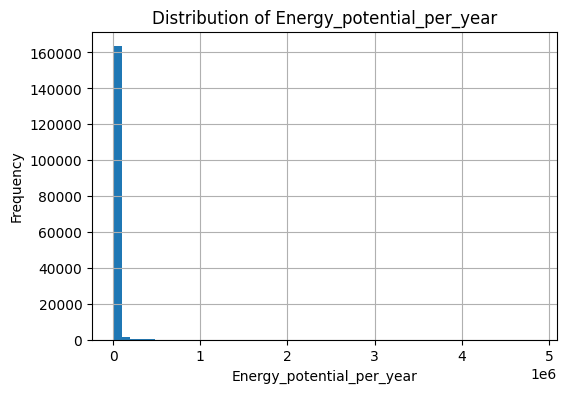

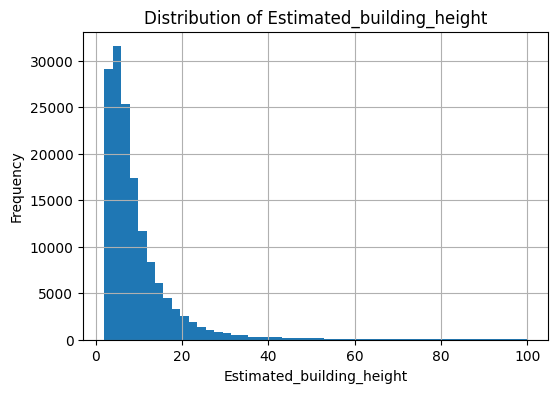

In [5]:
import matplotlib.pyplot as plt

# Step 5: Basic distribution plots for main numeric features
cols_to_plot = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    df[col].hist(bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

🧩 Step 5 Analysis – Distribution Plots
1️⃣ Surface_area

You can see one big vertical spike near zero and a very long, flat tail stretching right.

That shape = right-skewed distribution.

Most rooftops are small (below ~200 m²), but a handful reach several thousand m².

👉 Outliers = very large commercial or industrial buildings.

2️⃣ Potential_installable_area

Same shape — very tall spike near zero, long right tail.

It’s directly related to total surface, so it makes sense.

Most installable areas are < 100 m², but a few extreme ones go beyond 10 000 m².

3️⃣ Peak_installable_capacity

Exactly the same story.

The sharp rise at low kWp and the flat tail toward 3 000 kWp mean 99 % of buildings are small systems and < 1 % are massive.

4️⃣ Energy_potential_per_year

The spike at the left and long right tail show the same pattern again.

Most rooftops yield under 20 000 kWh/year.

A few rare points go into the millions → outliers.

5️⃣ Estimated_building_height

This one is not as extreme: the bars gradually decline.

That’s typical of an exponential-like shape — many 1- or 2-storey houses, fewer tall buildings.

✅ This looks clean and believable.

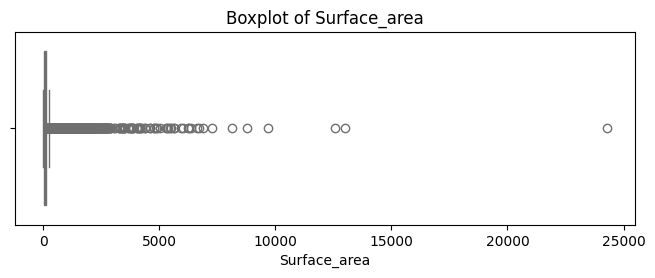

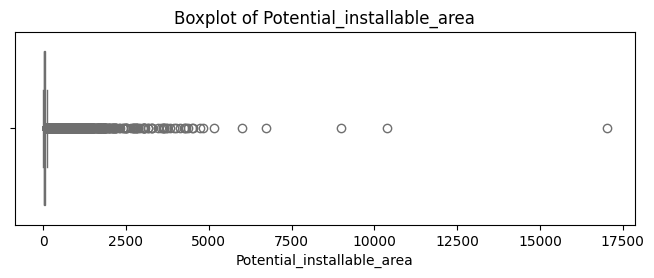

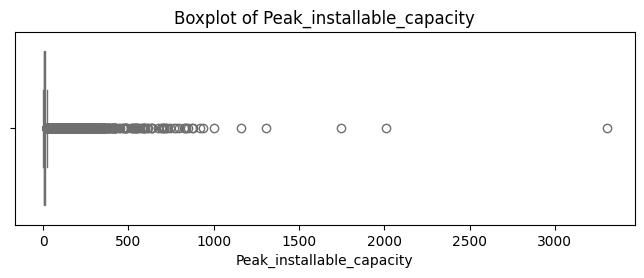

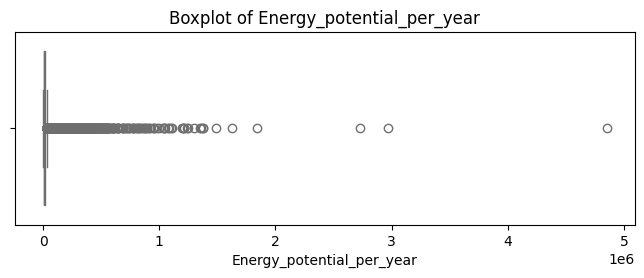

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Boxplots for key numeric features
cols_to_check = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year'
]

for col in cols_to_check:
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

| Variable                       | What the shape means                                              | What to conclude                                                 |
| ------------------------------ | ----------------------------------------------------------------- | ---------------------------------------------------------------- |
| **Surface_area**               | Most rooftops have < 200 m² area, but some are > 5 000–25 000 m². | Dataset contains a few huge commercial/industrial roofs.         |
| **Potential_installable_area** | Same pattern — most < 100 m², a few > 10 000 m².                  | Those large rooftops dominate potential capacity.                |
| **Peak_installable_capacity**  | Box at left, whiskers to right until ~3000 kWp.                   | Typical houses 2–15 kWp; outliers are large facilities.          |
| **Energy_potential_per_year**  | Tiny box left; values go up to ~5 million kWh/year.               | Majority < 20 000 kWh/year, but a handful of megaprojects exist. |


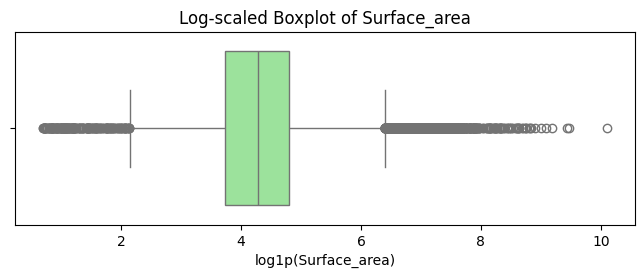

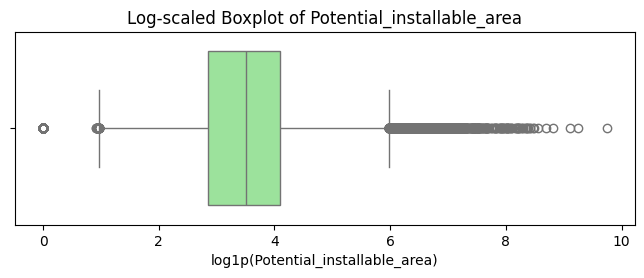

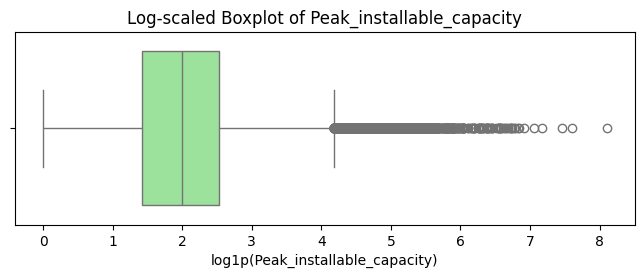

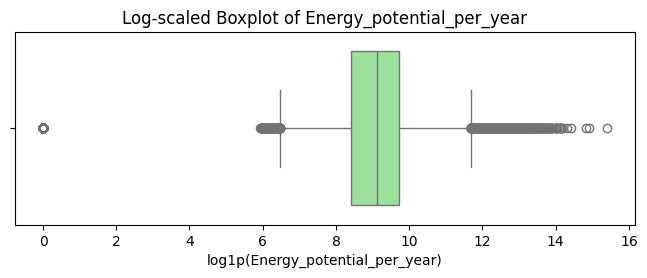

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Log-scaled boxplots
cols_to_check = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year'
]

for col in cols_to_check:
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(x=np.log1p(df[col]), color='lightgreen')
    plt.title(f"Log-scaled Boxplot of {col}")
    plt.xlabel(f"log1p({col})")
    plt.show()

🧩 Step 7 Analysis – Log-Scaled Boxplots
1️⃣ Surface_area

Now you can actually see the box (IQR) — the green rectangle — clearly between roughly log₁₀(2) ≈ 7 m² and log₁₀(5) ≈ 150 m² in real scale.

Most rooftops fall inside this band.

The scattered dots to the right are still there, but far fewer → these are true high-area outliers (large buildings).

2️⃣ Potential_installable_area

Box centered around log₁₀(4–5), which means ~50–150 m² of usable roof.

Few right-side dots = very large roofs with huge potential install area.

✅ Normal cluster is now clearly visible.

3️⃣ Peak_installable_capacity

The IQR is tight between log₁₀(1.5–3) ≈ 4–20 kWp — this is the sweet spot for residential systems.

A handful of points stretch beyond log₁₀(7–8) ≈ 1000–3000 kWp — those are industrial facilities.

4️⃣ Energy_potential_per_year

Box centered roughly around log₁₀(8–9) ≈ 3000–9000 kWh/year → normal home generation.

Dots beyond log₁₀(13–14) ≈ 500 000–1 000 000 kWh/year = large energy producers.

🧭 What You Can Conclude
| Insight                                   | Meaning                                                                                           |
| :---------------------------------------- | :------------------------------------------------------------------------------------------------ |
| **Right-skewed even after log-transform** | Real-world rooftop data are inherently unequal — many small roofs, few huge ones.                 |
| **Visible box after log-scaling**         | Confirms that transformation successfully reveals the dense residential region.                   |
| **Outliers = non-residential structures** | Keep them for policy or city-scale analyses; you may exclude them for residential model training. |

In [8]:
# Step 8.1: Count outliers beyond 99th percentile
outlier_summary = {}

for col in ['Surface_area', 'Potential_installable_area', 
            'Peak_installable_capacity', 'Energy_potential_per_year']:
    
    threshold = df[col].quantile(0.99)
    n_outliers = (df[col] > threshold).sum()
    outlier_summary[col] = {
        '99th_percentile': threshold,
        'outlier_count': n_outliers,
        'outlier_percent': round(n_outliers / len(df) * 100, 2)
    }

import pandas as pd
pd.DataFrame(outlier_summary).T

,99th_percentile,outlier_count,outlier_percent
Surface_area,587.059214,1657.0,1.0
Potential_installable_area,397.924805,1657.0,1.0
Peak_installable_capacity,77.174401,1657.0,1.0
Energy_potential_per_year,113569.293750,1657.0,1.0


In [9]:
# Step 8.2: Identify outlier building types
mask_outliers = (
    (df['Surface_area'] > df['Surface_area'].quantile(0.99)) |
    (df['Potential_installable_area'] > df['Potential_installable_area'].quantile(0.99)) |
    (df['Peak_installable_capacity'] > df['Peak_installable_capacity'].quantile(0.99)) |
    (df['Energy_potential_per_year'] > df['Energy_potential_per_year'].quantile(0.99))
)

outlier_types = df.loc[mask_outliers, 'Assumed_building_type'].value_counts()
normal_types  = df.loc[~mask_outliers, 'Assumed_building_type'].value_counts()

print("Outlier Building Types:\n", outlier_types)
print("\nNormal (non-outlier) Building Types:\n", normal_types)

Outlier Building Types:
 Assumed_building_type
Commercial                   855
Single-family residential    285
Schools                      231
Public                       196
Public health facilities     164
Industrial                    72
Multi-family residential      25
Hotels                        22
Name: count, dtype: int64

Normal (non-outlier) Building Types:
 Assumed_building_type
Single-family residential    148446
Commercial                     9044
Schools                        2393
Public                         1894
Public health facilities       1382
Hotels                          270
Industrial                      245
Multi-family residential        105
Name: count, dtype: int64


🧠 Interpretation

1️⃣ Who the outliers really are
Most of them belong to commercial, institutional, or industrial categories — exactly the types of buildings expected to have very large surface areas and energy potentials.
→ These are true, meaningful outliers, not data errors.

2️⃣ Residential records in outliers (≈ 285 houses)
They’re likely huge villas or mis-tagged properties.
They represent only 0.17 % of total data, so you can flag but safely keep them for now.

3️⃣ So should you drop or keep them?
| Purpose                                                                | Recommendation                                                    |
| :--------------------------------------------------------------------- | :---------------------------------------------------------------- |
| If your later analysis focuses on **residential solar potential** only | ✅ Exclude the top 1 % (and optionally all non-residential types). |
| If you aim for **overall city-scale solar mapping**                    | ✅ Keep them — they represent key large-capacity contributors.     |

In [10]:
# Step 9: Count zero values in key numeric columns
numeric_cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year'
]

for col in numeric_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(df)*100:.2f}%)")

Surface_area: 0 zeros (0.00%)
Potential_installable_area: 3870 zeros (2.34%)
Peak_installable_capacity: 3870 zeros (2.34%)
Energy_potential_per_year: 3870 zeros (2.34%)


🧠 Interpretation

These three columns are perfectly correlated in their zeros — that’s a strong hint they all describe the same unusable rooftops.

The reason isn’t a data error but likely a physical constraint:

Buildings too small, too shaded, or roof slope unsuitable for solar.

Hence, model sets them to zero.

So:

These zeros are valid, not missing.

But they can distort correlations because zeros behave like strong anchors.

🔍 Recommendation
| Purpose                                                                                     | Action                                                                                  |
| :------------------------------------------------------------------------------------------ | :-------------------------------------------------------------------------------------- |
| If you want to study *relationship strength* between numeric features (correlation heatmap) | ✅ **Exclude zero rows** before correlation — they will artificially lower coefficients. |
| If you want to keep dataset for *total potential analysis* (including unviable roofs)       | ✅ Keep them — they represent part of city reality (non-feasible buildings).             |

Since we’re moving toward EDA and correlation, let’s temporarily exclude the zero cases in the next step for clarity (we can keep a copy for city-level totals later).

In [11]:
# Step 10: create filtered copy without zero potential rows
df_nozero = df[
    (df['Potential_installable_area'] > 0) &
    (df['Peak_installable_capacity'] > 0) &
    (df['Energy_potential_per_year'] > 0)
].copy()

print("Original dataset:", df.shape)
print("Filtered (no-zero) dataset:", df_nozero.shape)

Original dataset: (165629, 13)
Filtered (no-zero) dataset: (161759, 13)


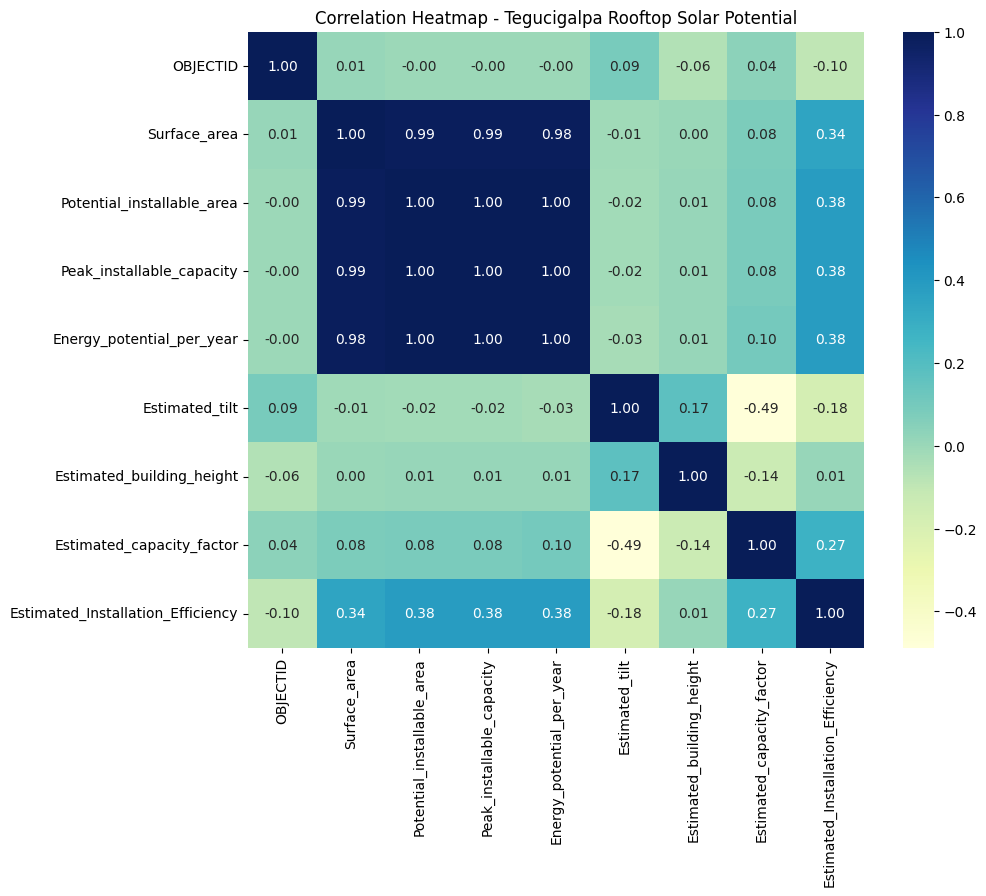

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 11: Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
corr = df_nozero.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu', square=True)
plt.title("Correlation Heatmap - Tegucigalpa Rooftop Solar Potential")
plt.show()